# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [55]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geoviews as gv
from geoviews import opts


# Import API key
from api_keys import geoapify_key

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Saint-Adolphe-d'Howard,45.9713,-74.3393,2.83,65,3,4.13,CA,1731796083
1,1,吉安市,27.1145,114.9836,18.08,95,0,2.84,CN,1731796084
2,2,新巴尔虎右旗,48.6705,116.8161,-10.65,59,5,7.05,CN,1731796085
3,3,دهستان طبس,36.4039,57.7089,6.50,51,85,0.87,IR,1731796090
4,4,Pau d'Arco do Piauí,-5.2544,-42.3871,32.14,24,47,2.44,BR,1731796092


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [30]:
import cartopy
print("Cartopy imported successfully!")


Cartopy imported successfully!


In [26]:
import sys
print(sys.executable)

c:\Users\yzmen\anaconda3\envs\dev\python.exe


In [27]:
import sys
print(sys.path)


['c:\\python-api-challenge\\WeatherPy', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\python310.zip', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\DLLs', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\lib', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev', '', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\lib\\site-packages', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\lib\\site-packages\\win32', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\lib\\site-packages\\win32\\lib', 'c:\\Users\\yzmen\\anaconda3\\envs\\dev\\lib\\site-packages\\Pythonwin']


In [29]:
import sys
sys.path.append(r"C:\Users\yzmen\anaconda3\envs\geo_env\lib\site-packages")
import cartopy
print("Cartopy imported successfully!")


Cartopy imported successfully!


In [34]:
import geoviews
print("GeoViews imported successfully!")


GeoViews imported successfully!


In [35]:
import cartopy
import geoviews
import pyproj
import hvplot.pandas

In [ ]:
# Configure the map plot
city_data_df.hvplot.points(
    "Lng", "Lat",
    size="Humidity",  # Point size reflects humidity
    color="Humidity",
    geo=True,
    tiles="OSM",  # OpenStreetMap background
    title="City Humidity Map"
)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity)

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [43]:
print(city_data_df.columns)


Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [44]:
print(city_data_df.head())

   City_ID                    City      Lat       Lng  Max Temp  Humidity  \
0        0  Saint-Adolphe-d'Howard  45.9713  -74.3393      2.83        65   
1        1                     吉安市  27.1145  114.9836     18.08        95   
2        2                  新巴尔虎右旗  48.6705  116.8161    -10.65        59   
3        3              دهستان طبس  36.4039   57.7089      6.50        51   
4        4     Pau d'Arco do Piauí  -5.2544  -42.3871     32.14        24   

   Cloudiness  Wind Speed Country        Date  
0           3        4.13      CA  1731796083  
1           0        2.84      CN  1731796084  
2           5        7.05      CN  1731796085  
3          85        0.87      IR  1731796090  
4          47        2.44      BR  1731796092  


In [ ]:
# arrow down cities that fit criteria (example criteria provided)
# Filter cities based on your criteria
criteria_df = city_data_df[
    (city_data_df["Max Temp"] < 75) &    # Temperature less than 75
    (city_data_df["Humidity"] < 50)     # Humidity less than 50
]

# Drop rows with null values
cleaned_df = criteria_df.dropna()

# Display a sample of the cleaned data
print(cleaned_df.sample(5))

    City_ID                 City      Lat      Lng  Max Temp  Humidity  \
9         9                Belel   7.0500  14.4333     16.41        35   
4         4  Pau d'Arco do Piauí  -5.2544 -42.3871     32.14        24   
54       54           El Triunfo  -1.9333 -79.9667     29.02        39   
28       28                 رقان  26.7158   0.1714     24.80        15   
7         7            Brentwood  40.7812 -73.2462     14.46        37   

    Cloudiness  Wind Speed Country        Date  
9           99        1.93      CM  1731796098  
4           47        2.44      BR  1731796092  
54          16        4.41      EC  1731796192  
28           3        2.46      DZ  1731796142  
7            0        5.14      US  1731795874  


In [42]:
# Step 1: Narrow down cities that fit criteria (example criteria provided)
# Modify the conditions based on your criteria
criteria_df = city_data_df[
    (city_data_df["population"] > 50000) &   # Example condition: Population > 50,000
    (city_data_df["temperature"] < 75) &    # Example condition: Temperature < 75
    (city_data_df["humidity"] < 50)         # Example condition: Humidity < 50
]

# Step 2: Drop any rows with null values
cleaned_df = criteria_df.dropna()

# Step 3: Display sample data
print(cleaned_df.sample(5))  # Display 5 random rows from the filtered DataFrame

KeyError: 'population'

### Step 3: Create a new DataFrame called `hotel_df`.

In [47]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
print(hotel_df.sample(5))

            City Country      Lat       Lng  Humidity Hotel Name
49  Santa Leonor      ES  40.4325   -4.3874        83           
6        Badasso      CI   5.6833   -4.5167        94           
2         新巴尔虎右旗      CN  48.6705  116.8161        59           
38     محمد جاسم      IQ  33.1752   44.4779        38           
7      Brentwood      US  40.7812  -73.2462        37           


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [48]:
# Set search radius (in meters, e.g., 5000 for 5 km)
radius = 5000

# Geoapify API parameters
params = {
    "categories": "accommodation.hotel",  # Search for hotels
    "apiKey": "YOUR_GEOAPIFY_API_KEY",    # Replace with your actual Geoapify API key
    "limit": 1                            # Limit to the closest hotel
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = response.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.sample(5)

Starting hotel search
Saint-Adolphe-d'Howard - nearest hotel: No hotel found
吉安市 - nearest hotel: No hotel found
新巴尔虎右旗 - nearest hotel: No hotel found
دهستان طبس - nearest hotel: No hotel found
Pau d'Arco do Piauí - nearest hotel: No hotel found
Devgarh - nearest hotel: No hotel found
Badasso - nearest hotel: No hotel found
Brentwood - nearest hotel: No hotel found
Kasangulu - nearest hotel: No hotel found
Belel - nearest hotel: No hotel found
Timokten - nearest hotel: No hotel found
马当镇 - nearest hotel: No hotel found
Aşkale - nearest hotel: No hotel found
Moiso - nearest hotel: No hotel found
Darfield - nearest hotel: No hotel found
Padievytis - nearest hotel: No hotel found
Вакраково - nearest hotel: No hotel found
Newman - nearest hotel: No hotel found
文城乡 - nearest hotel: No hotel found
Ibinabam - nearest hotel: No hotel found
Bengaluru - nearest hotel: No hotel found
Serpa - nearest hotel: No hotel found
Daram - nearest hotel: No hotel found
Arthurton - nearest hotel: No hotel f

,City,Country,Lat,Lng,Humidity,Hotel Name
12,Aşkale,TR,39.9208,40.6950,92,No hotel found
46,Vicos,PE,-9.3285,-77.5533,75,No hotel found
17,Newman,US,37.3138,-121.0208,37,No hotel found
7,Brentwood,US,40.7812,-73.2462,37,No hotel found
8,Kasangulu,CD,-4.5911,15.1708,95,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [63]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource

# Enable Bokeh output in the notebook
output_notebook()

# Example data for hotel locations: Latitude, Longitude, City Names
data = {
    'Lat': [51.509865, 48.8566, -33.8688, 40.7128],  # Latitude: London, Paris, Sydney, NYC
    'Lng': [-0.118092, 2.3522, 151.2093, -74.006],   # Longitude
    'City': ['London', 'Paris', 'Sydney', 'New York'],
}

# Function to convert latitude/longitude to Web Mercator coordinates
def mercator_projection(lat, lon):
    import math
    k = 6378137  # Radius of the Earth in meters
    x = k * math.radians(lon)
    y = k * math.log(math.tan((math.pi / 4) + (math.radians(lat) / 2)))
    return x, y

# Convert data into Web Mercator coordinates
web_mercator_coords = [mercator_projection(lat, lon) for lat, lon in zip(data['Lat'], data['Lng'])]
data['x'] = [coord[0] for coord in web_mercator_coords]
data['y'] = [coord[1] for coord in web_mercator_coords]

# Create a ColumnDataSource from data
source = ColumnDataSource(data)

# Create the figure
p = figure(
    title="World Map with Hotel Locations",
    x_axis_type="mercator",  # Web Mercator projection
    y_axis_type="mercator",
    width=900,
    height=600,
)

# Add OpenStreetMap tiles (or other available tiles)
tile_provider = get_provider(Vendors.OSM)  # OpenStreetMap tiles
p.add_tile(tile_provider)

# Add city markers and labels
p.circle(x='x', y='y', size=10, color="blue", alpha=0.7, source=source)
p.text(
    x='x',
    y='y',
    text='City',
    text_font_size="10pt",
    text_align="left",
    text_baseline="middle",
    source=source,
    x_offset=10,
)

# Display the map
show(p)


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
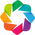

:Overlay
   .Points.I :Points   [Lng,Lat]   (City,Country,Hotel Name)
   .Labels.I :Labels   [Lng,Lat]   (City)

In [57]:
# Enable GeoViews extension
gv.extension("bokeh")

# Configure the map plot
map_plot = gv.Points(
    hotel_df,
    kdims=["Lng", "Lat"],  # Longitude and Latitude for points
    vdims=["City", "Country", "Hotel Name"],  # Additional info displayed on hover
).opts(
    opts.Points(
        size=10,
        color="blue",
        tools=["hover"],  # Enable hover tool
        width=800,
        height=600,
        title="Hotel Locations",
        projection=ccrs.PlateCarree(),
        global_extent=True,
    )
)

# Add labels to the map (e.g., city names)
labels = gv.Labels(
    hotel_df, kdims=["Lng", "Lat"], vdims=["City"]
).opts(opts.Labels(text_align="left", text_font_size="8pt"))

# Combine points and labels
map_with_labels = map_plot * labels

# Display the map
map_with_labels

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)